In [8]:
import json
import pandas as pd
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from helpers.helper import *

In [5]:
def parse_data():
    all_events = []
    with open('../data/statsbomb360/events/3788747.json', 'r') as f:
        events = json.load(f)

    passes = [x for x in events if x['type']['name'] == "Pass"]
            
    for p in tqdm(passes):
        attributes = {
            "x": p['location'][0],
            "y": p['location'][1],
            "end_x": p['pass']['end_location'][0],
            "end_y": p['pass']['end_location'][1],
            "outcome": 0 if 'outcome' in p['pass'].keys() else 1,
        }
        all_events.append(attributes)
            
    return pd.DataFrame(all_events)

df = parse_data()
df

100%|██████████| 956/956 [00:00<00:00, 566349.52it/s]


,x,y,end_x,end_y,outcome
0,60.0,40.0,60.3,41.4,1
1,57.4,39.7,34.5,38.0,1
2,34.9,38.9,35.6,54.7,1
3,36.7,55.3,33.7,41.7,1
4,34.3,38.8,45.1,16.6,1
...,...,...,...,...,...
951,42.1,32.9,24.6,27.9,1
952,24.6,29.8,12.5,40.6,1
953,14.6,45.0,104.5,30.8,0
954,19.7,51.6,27.0,54.3,1


In [7]:
model = KMeans(n_clusters=50)
features = df[['x', 'y', 'end_x', 'end_y']]

fit = model.fit(features)

df['cluster'] = model.predict(features)
df.head(10)


,x,y,end_x,end_y,outcome,cluster
0,60.0,40.0,60.3,41.4,1,4
1,57.4,39.7,34.5,38.0,1,4
2,34.9,38.9,35.6,54.7,1,25
3,36.7,55.3,33.7,41.7,1,39
4,34.3,38.8,45.1,16.6,1,9
5,47.6,16.0,40.1,31.7,1,44
6,51.5,39.5,55.7,63.8,1,41
7,64.8,62.7,76.4,73.0,1,15
8,74.7,71.4,81.1,56.0,1,3
9,82.4,57.3,86.0,61.1,1,30


AttributeError: 'AxesSubplot' object has no attribute 'xlim'

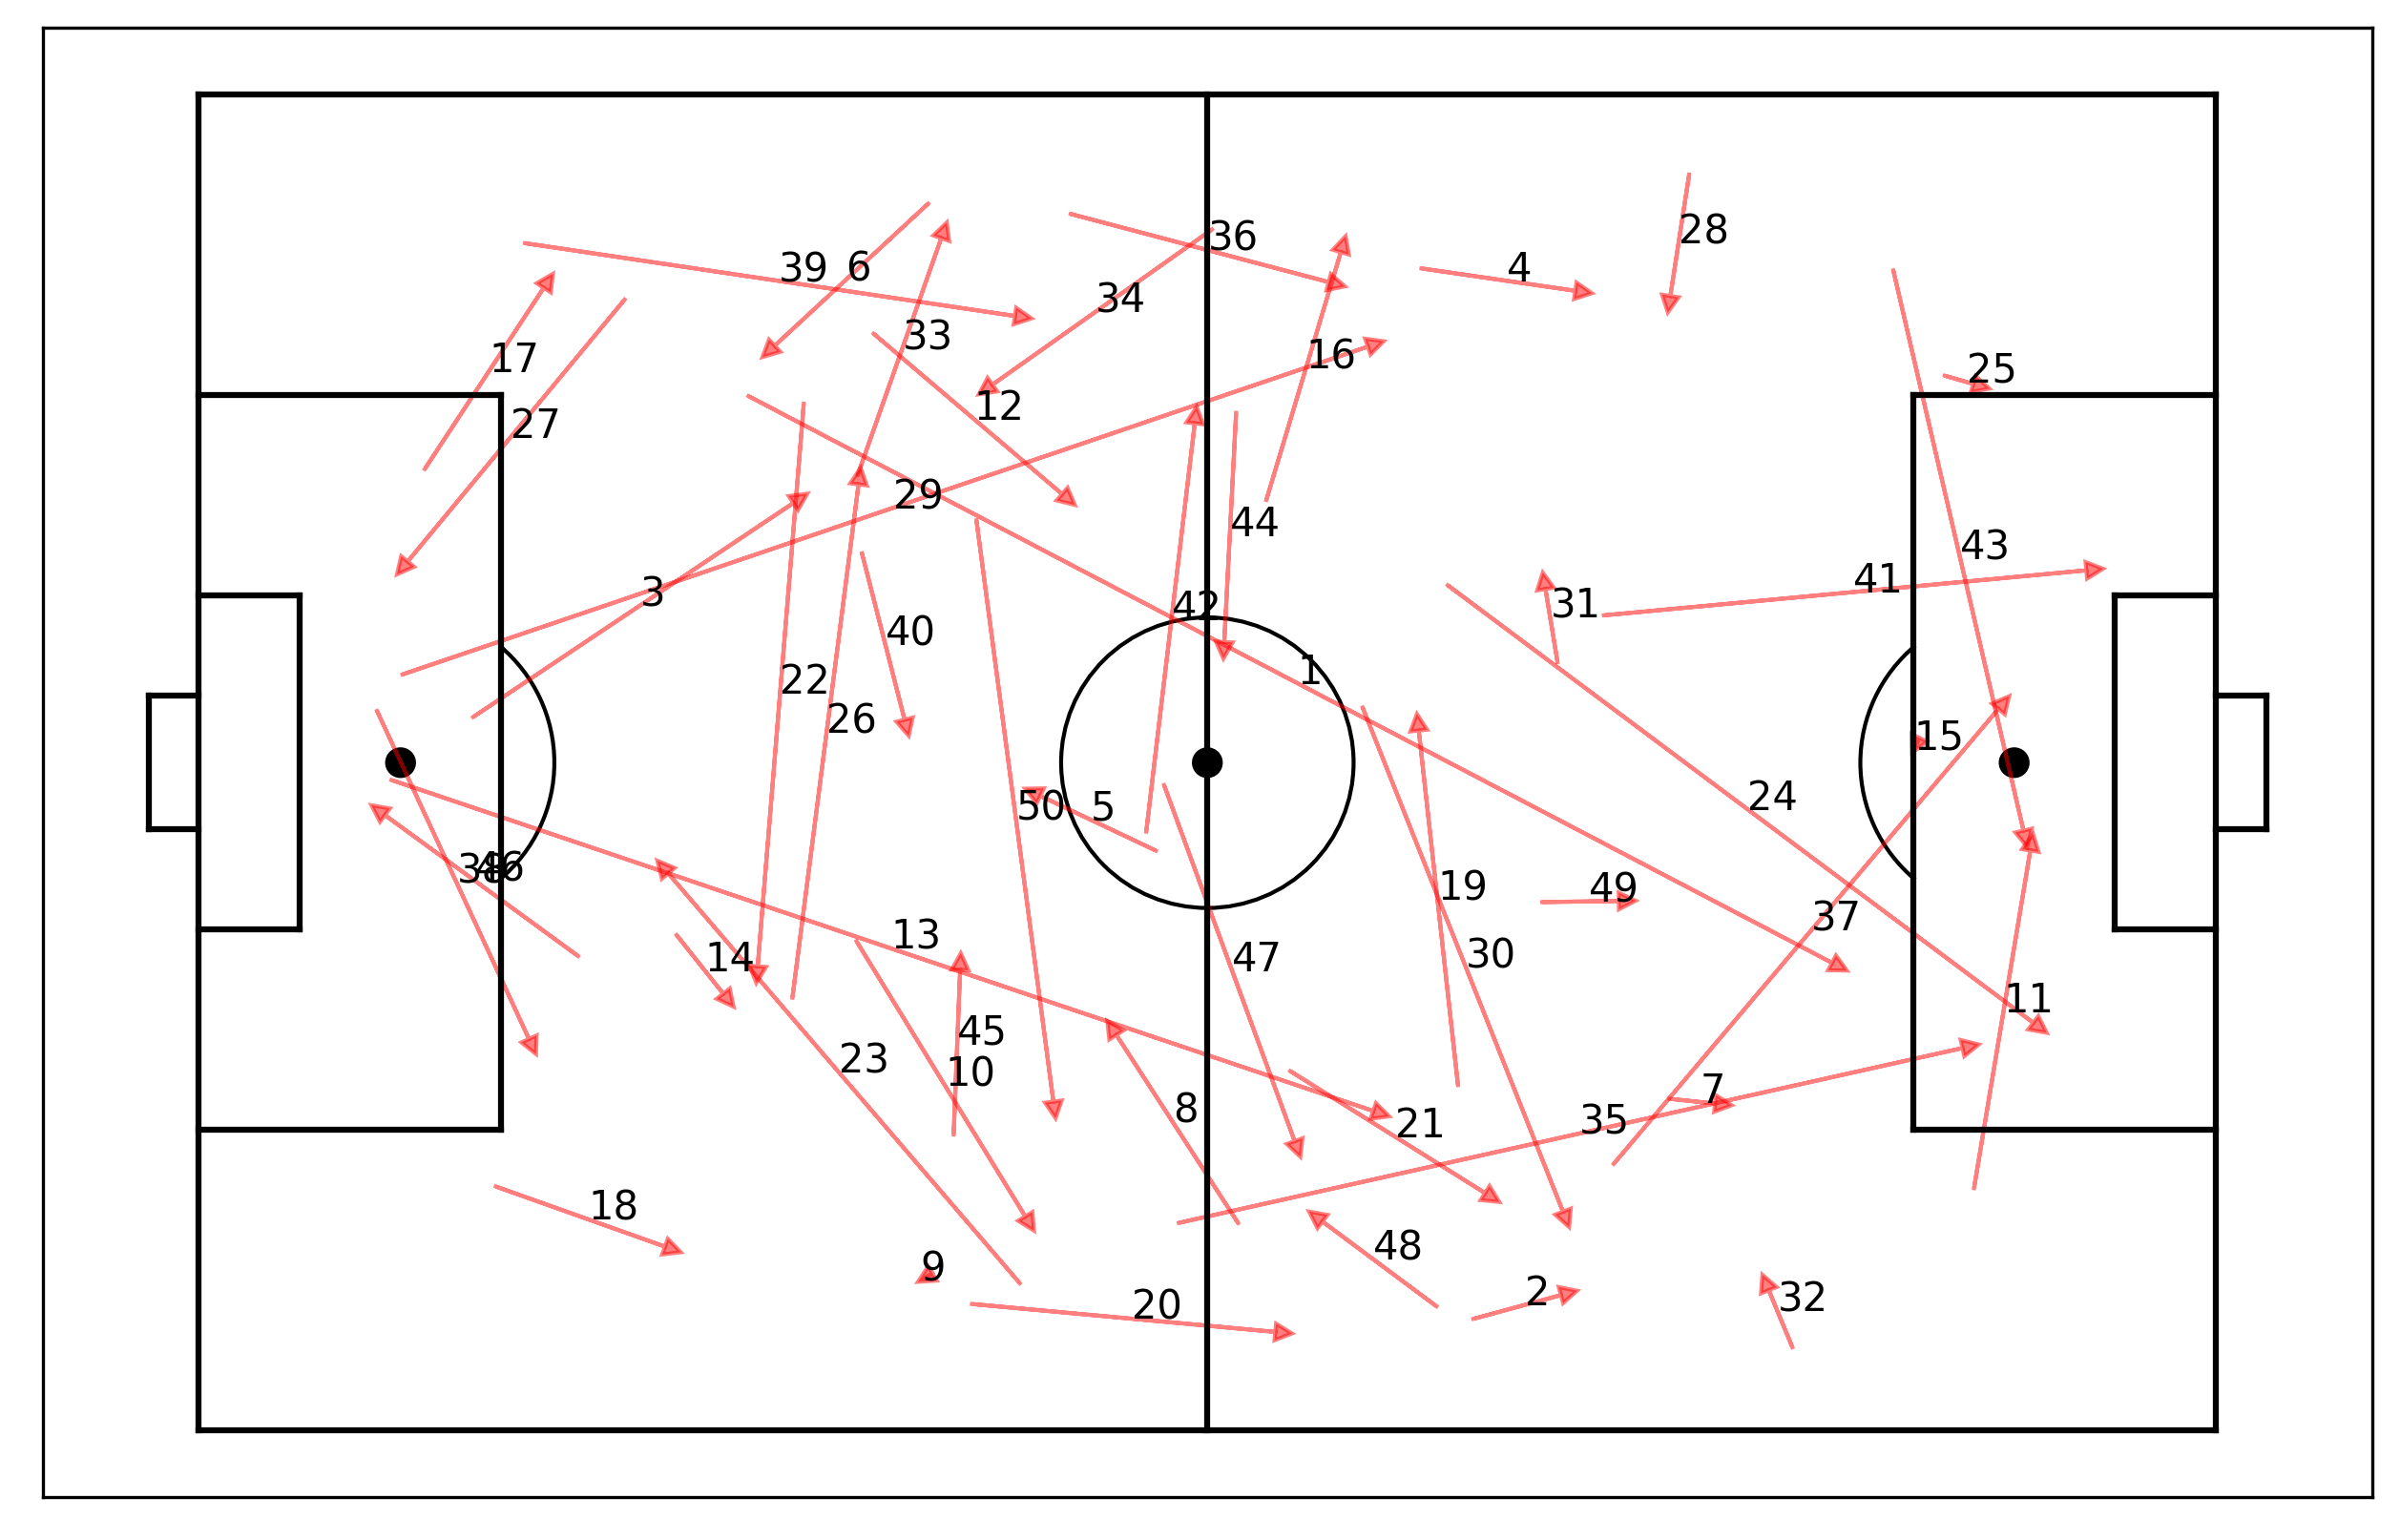

In [9]:
plt = draw_pitch()

for i, (x, y, end_x, end_y) in enumerate(fit.cluster_centers_):
    plt.arrow(x, y, end_x-x, end_y-y,
              head_width=1,
              head_length=1,
              color='red',
              alpha=0.5,
              length_includes_head=True)

    plt.text((x + end_x) / 2, (y + end_y) / 2, str(i + 1))

plt.xlim(0, 120)
plt.ylim(0, 80)
plt.show()
